In [2]:
'''
Searches for Gundam pictures, and then downloads all the resulting images using Selenium to scroll down.
After all images are downloaded, the following actions are performed:
1) Convert the images to greyscale and save them into a separate directory
2) Resize the images to 28px by 28px and save them into a separate directory
3) With the 28px by 28px, create images of 5x5 photo grids
4) Randomly, apply filters (e.g. blur, rotation) on the original images and save them into a separate directory. 
Rename the new images with the applied filter’s name. 
E.g. if the original filename is img_1234.jpg, a blur filter is applied, 
and the new filename would be img_1234_blue.jpg.
'''

import requests, os, bs4
from selenium import webdriver
from time import sleep
from bs4 import BeautifulSoup


# starting url
url = 'https://imgur.com'  

# create folder named imgur to download images to
os.makedirs('imgur', exist_ok=True)    # store images in ./imgur

#browser = webdriver.Firefox(executable_path = './geckodriver')
browser = webdriver.Firefox(executable_path =r'C:/Users/Chiff/Desktop/AI/python/LU04/geckodriver')
newinst=browser.get(url)


# search for "gundam mobile suit" photos
searchinput = browser.find_element_by_class_name('Searchbar-textInput')
searchinput.send_keys("mobile suit gundam")
searchinput.submit()
sleep(15)
linklist=[]
soup_level1=BeautifulSoup(browser.page_source, 'html.parser')
#print(soup_level1.prettify())

# get list of links to images
imglist=soup_level1.find_all("img")
for i in imglist:
#     print(i)
    linklist.append(i)
print(len(linklist))
print('Done.')

63
Done.


In [3]:
'''
1) Convert the images to greyscale and save them into a separate directory
2) Resize the images to 28px by 28px and save them into a separate directory
'''


import urllib.request
from PIL import Image

count=0
gssave_path="imgur/greyscale"
rssave_path="imgur/resize"
if not os.path.exists(gssave_path):
    os.makedirs(gssave_path)
if not os.path.exists(rssave_path):
    os.makedirs(rssave_path)
        
for image in imglist:
#     print(image["src"])
    try:
        urllib.request.urlretrieve("http:"+image["src"], "imgur/%s.jpg" %(str(count)))
        gsimg = Image.open('imgur/%s.jpg' %(str(count))).convert('L')
        gsimg.save(gssave_path+'/gs%s.jpg' %(str(count)))
        print("Greyscale img saved")
        rsimg = Image.open('imgur/%s.jpg' %(str(count))).resize((28,28))
        rsimg.save(rssave_path+'/rs%s.jpg' %(str(count)))
        print("Resized img saved")

        count+=1
    except:
        print("An error occurred")

Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale img saved
Resized img saved
Greyscale im

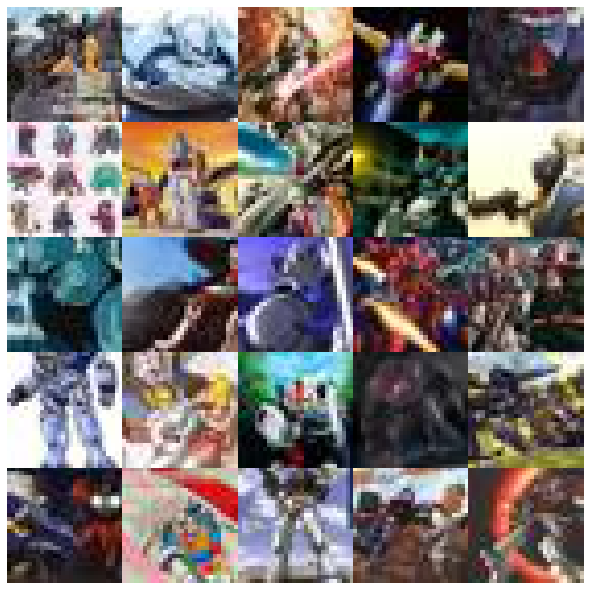

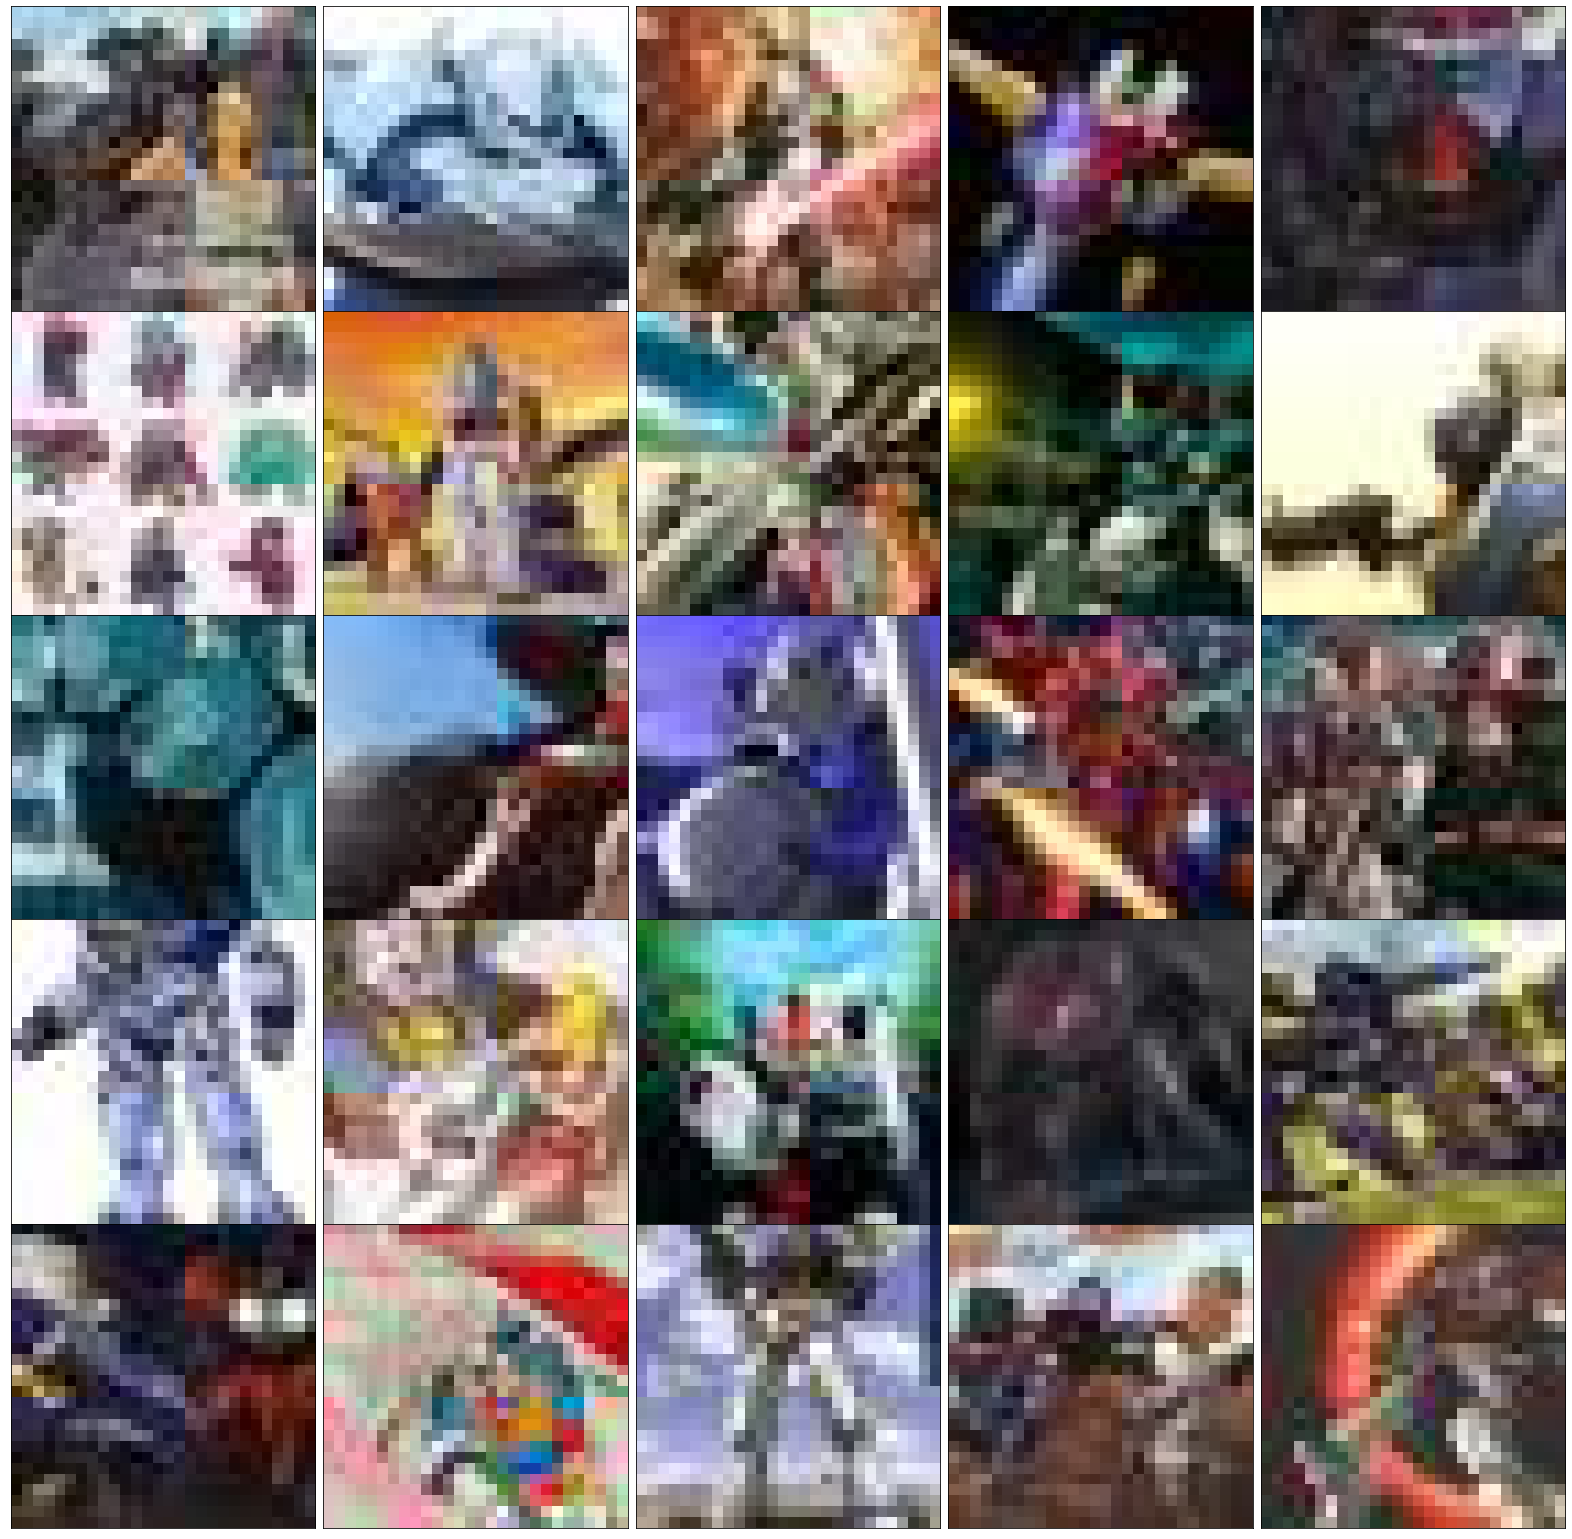

In [6]:
'''
3) With the 28px by 28px, create images of 5x5 photo grids
'''


import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

os.listdir()
w=10
h=10
x1=plt.figure(figsize=(8,8))
columns=5
rows=5

# Testing method 1 to show 5x5 image grid
for i in range(0,columns*rows):
    img=Image.open(r"imgur\resize\rs%s.jpg" %i)
    x1.add_subplot(rows,columns,i+1)
    plt.imshow(img)
    
    x1.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    plt.axis("off")
    plt.axis("tight")
    plt.axis("image")

# Testing method 2 to show 5x5 image grid
fig3, ax3 = plt.subplots(5, 5, figsize=(28, 28))
fig3.subplots_adjust(hspace=0, wspace=0)
for i in range(5):
    for j in range(5):
        ax3[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax3[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax3[i, j].imshow(Image.open(r"imgur\resize\rs%s.jpg" %(i*columns+j)))

In [7]:
'''
4) Randomly, apply filters (e.g. blur, rotation) on the original images and save them into a separate directory. 
Rename the new images with the applied filter’s name. 
E.g. if the original filename is img_1234.jpg, a blur filter is applied, 
and the new filename would be img_1234_blue.jpg.
'''

import numpy as np
import matplotlib.pyplot as plt
import random

from PIL import Image
from PIL import ImageFilter
from PIL.ImageFilter import (BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
    EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN)

# create save path
resultsave_path="imgur/result"
if not os.path.exists(resultsave_path):
    os.makedirs(resultsave_path)

    
# Image.open("testfolder/0.jpg")

# create different filter dictionary
filterdict={BLUR: "blur", 
            CONTOUR: "contour", 
            DETAIL: "detail", 
            EDGE_ENHANCE: "edge_enhance", 
            EDGE_ENHANCE_MORE: "edge_enhance_more",
            EMBOSS: "emboss", 
            FIND_EDGES: "find_edges", 
            SMOOTH: "smooth", 
            SMOOTH_MORE: "smooth_more", 
            SHARPEN: "sharpen"}

# loop through number of images to open and apply filter, saving it in result folder
for item in range(0,len(imglist)):
    try:
        print(item)
        orig=Image.open("imgur/%i.jpg" %item)
        print(orig)
        currentfilter=random.choice(list(filterdict.keys()))
        edited=orig.filter(currentfilter)
        orig.close()
        print(currentfilter)
        print(filterdict.get(currentfilter))
        edited.save("imgur/result/%i_%s.jpg" %(item, filterdict.get(currentfilter)))
        print(edited)
        edited.close()
    except:
        print("Error")

0
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x160 at 0x1F988678188>
<class 'PIL.ImageFilter.EMBOSS'>
emboss
<PIL.Image.Image image mode=RGB size=160x160 at 0x1F988678848>
1
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x160 at 0x1F98867C6C8>
<class 'PIL.ImageFilter.DETAIL'>
detail
<PIL.Image.Image image mode=RGB size=160x160 at 0x1F988678588>
2
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x160 at 0x1F988678208>
<class 'PIL.ImageFilter.CONTOUR'>
contour
<PIL.Image.Image image mode=RGB size=160x160 at 0x1F9886780C8>
3
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x160 at 0x1F98867C788>
<class 'PIL.ImageFilter.SMOOTH'>
smooth
<PIL.Image.Image image mode=RGB size=160x160 at 0x1F988678C88>
4
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x160 at 0x1F98867C7C8>
<class 'PIL.ImageFilter.SMOOTH_MORE'>
smooth_more
<PIL.Image.Image image mode=RGB size=160x160 at 0x1F988678188>
5
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1